# Árboles de Decisión y Bosque Aleatorio

## Objetivo



<span style="font-size: 16px">Construir un clasificador capaz de identificar el riesgo de adquirir diabetes en mujeres a partir de los 21 años de edad</span>

## Fuente de los datos

<span style="font-size: 16px">

1. [Pima Indians Diabets Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) <br>
    Este conjunto de datos tiene 6 atributos independientes y un atributo dependiente (objetivo). El objetivo es identificar a los pacientes en riesgo de adquirir diabetes tipo 2 dentro de los próximos 5 años. Los datos se refieren a una población de mujeres provenientes de comunidades indígenas americanas ubicadas en Arizona, específicamente la comunidad *Pima*. Los pacientes cuya prueba *OGTT* (*Oral Glucose Tolerance Test*) haya resultado mayor a 200mg/dl fueron diagnosticados con diabetes y excluidos de este conjunto de datos. 
|     Atributo      |          Descripción        |
|:-----------------:|:---------------------------:|
| Pregnancies       | Número de embarazos       |
| Glucose           | Concentración de glucosa en una prueba *OGTT* (mg/dl)|
| Blood Pressure    | Presión sanguínea diastólica (mmHg)            |
| Skin Thickness    | Grueso de doblez en triceps (mm)           |
| Insulin           | Prueba de insulina de 2 horas (mmuU/ml)             |
| BMI               | Índice de Masa Corporal (kg/m²)    |
| Diabetes Pedigree | Antecedentes familiares de diabetes (función no especificada) |
| Age               | Edad   |
| Outcome           | 1 = riesgo de contraer diabetes <br> 0 = sin riesgo actual  |
 

2. [CDC: National Health and Nutrition Examination Survey](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey/home ) <br> Este conjunto de datos contiene información del programa de estudios diseñado para asesorar el estado de salud y nutricional de adultos y niños en los Estados Unidos. Contiene 5 tablas: demographics, examinations, dietary, laboratory, questionnaire y medication, todas relacionadas a cada paciente. Para el desarrollo del clasificador se utilizarán 11 atributos de 4 de las 5 tablas.

|        Atributo   | Descripción            |
|:-----------------:|:--------------------------: |
| RHQ160 (questionnaire.csv)       |  Pregnancies |
| LBXGLT (labs.csv) | Glucose                     |
| BPXPLS (labs.csv) | Blood Pressure              |
| BMXARMC (labs.csv)| Skin Thickness              |
| LBXIN (labs.csv)  | Insulin                     |
| BMXBMI (examination.csv)| BMI                   |
| MCQ300C (questionnaire.csv) | Diabetes Pedigree |
| DMDHRAGE (demographic.csv)  | Age               |
| DID040 (questionnaire.csv)  | Outcome           | 
| DIQ160 (questionnaire.csv)  | Outcome2          |
| DMDHRGND (demographic.csv)  | Gender            |

En la tabla anterior, la descripción se refiere al atributo similar del conjunto de datos **Pima**. Outcome y Outcome2 se mezclarán en una sola columna; Gender se eliminará después de obtener únicamente los registros para mujeres. 
   
Las descripciones completas de los conjuntos de datos pueden ser consultadas en los siguientes links: 

[Labs variable list](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013)

[Questionnaire variable list](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013)

[Demographics variable list](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)

[Examination variable list](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013)

</span>

## Preprocesamiento de Datos

<span style = "font-size: 16px"> 
<ol>
  <li style = "font-size: 16px">Data Source Collection and Preparation</li>
    <ol>
        <li style = "font-size: 16px, type=A"> <code>pima = read_file(diabetes.csv)</code> </li>
        <li style = "font-size: 16px, type=A">Define dataframes df1, df2, df3 and df4:<code><br>df1 = read_file(labs.csv)<br>df2 = read_file(examination.csv)<br>df3 = read_file(demographic.csv)<br>df4 = read_file(questionnaire.csv)</code> </li>
        <li style = "font-size: 16px, type=A"> <code>cdc = concatenate(df1,df2,df3,df4)</code></li>
        <li style = "font-size: 16px, type=A">Rename columns of interest in <code>cdc</code> (as described in Sources section) and drop the rest.</li>
    </ol>
  <li style = "font-size: 16px">Feature Engineering and Selection</li>
    <ol>
        <li style= "font-size: 16px, type=A">Compute statistic summary of <code>pima</code> and <code>cdc</code> datasets to obtain an overview of the required preparation tasks. 
        <li style= "font-size: 16px, type=A"> Specify range of values for each attribute according to specialized references. <table>
              <tr>
                <th>Attribute</th>
                <th>Range</th>
              </tr>
              <tr>
                <th>Pregnancies</th>
                <th>[0, 11]</th>
              </tr>
              <tr>
                <th>Glucose</th>
                <th>[40, 200]</th>
              </tr>
              <tr>
                <th>BloodPressure</th>
                <th>[40, 180]</th>
              </tr>
              <tr>
                <th>SkinThickness</th>
                <th>[15, 70]</th>
              </tr>
              <tr>
                <th>Insulin</th>
                <th>[0, 400]</th>
              </tr>
              <tr>
                <th>BMI</th>
                <th>[15, 67]</th>
              </tr>
              <tr>
                <th>Diabetes Pedigree Function</th>
                <th>[0, 2.5]</th>
              </tr>
              <tr>
                <th>Age</th>
                <th>[21, 90]</th>
              </tr>
              <tr>
                <th>Outcome</th>
                <th>[0, 1]</th>
              </tr>
            </table>
            </li>
        <li style= "font-size: 16px, type=A">Outlier and range value corrections on <code>pima</code><br> Outliers where imputed either with mean, min or max value of the range while considering the Outcome value as well.</li>
        <li style= "font-size: 16px, type=A"> Delete Male gender from <code>cdc</code>dataset.<br><code>cdc = cdc.deleteRowsWhere(Gender == Male)<br>cdc = cdc.drop(Column == Gender)</code></li>
        <li style= "font-size: 16px, type=A">Outlier and range values correction on <code>cdc</code>.<br>Outliers where imputed either with mean, min or max value of the attribute while considering the Outcome value as well.<br> Skin Thickness on this dataset comes from a different kind of arm measurement than the one applied on <code>pima</code>. A linear relationship was assumed between them so the following function was applied on <code>cdc.SkinThickness</code> to transform into a compatible range. <code>f(x) = 15 + (15/49)(x - 10.4)</code><br><code>for row in cdc.SkinThickness: <br>   row = f(row)</code><br>Diabetes Pedigree Function on <code>cdc</code> dataset corresponds to the number of close relatives with diabetes that the patient has. A linear relationship was assumed with the respective attribute from <code>pima</code> and the function <code>g(x) = (5/16)(x - 1)</code> was applied to obtaing compatible range.<br><code>for row in cdc.DPF:<br>   row = g(row)</code></li>
        <li style= "font-size: 16px, type=A">Merge Outcome and Outcome2 columns on <code>cdc</code> and correct values to range [0,1]. <br>Outcome corresponds to the age at which the patient was informed he/she had diabetes.<br>Outcome2 corresponds to wether the patient had ever been informed by a doctor if he/she was at risk of acquiring diabetes.<br><code>cdc.Outcome = merge(Outcome,Outcome2)</code><br><code>for outcome_val in cdc.Outcome: <br>    if outcome_val is NaN:<br>      outcome_val = 0 <br>   else:<br>      outcome_val = 1<br>cdc.drop(Column = Outcome2) </code></li>
        <li style = "font-size: 16px">Impute missing values for Glucose, BloodPressure, Insulin and BMI in <code>cdc</code><br><code>for column in [Glucose, BP, Insulin, BMI]:<br>   for row in column:<br>      if row.value is NaN:<br>         value = column.meanValue()</code></li>
        <li style = "font-size: 16px">Visualize all <code>cdc</code> and <code>pima</code> histograms in separate grids.</li>
        <li style = "font-size: 16px"><code>pima</code> has 268 positive and 500 negative class members in Outcome column. <code>cdc</code> has 516 positive and more than 4,200 negative class members in Outcome column. Extract all 516 positive observations and 284 negative observations from <code>cdc</code>and then merge this samples with <code>pima</code> to obtain the final dataset. This was done so there is a class balance in the <code>final</code>dataset (784 observations of each class.)<br><code>positive_sample = cdc.copy_Rows_Where(Outcome == 1)<br>negative_sample = cdc.copy_Rows_Where(Outcome == 0)<br>negative_sample.delete_3000Rows_Where( Glucose == 108) # Glucose excess of outliers<br>negative_sample.random_sample(284)<br>final = concatenate(pima, positive_sample, negative_sample) </code></li>
        <li style= "font-size: 16px, type=A">Convert Age column into bins and encode for <code>final</code> dataset.<br> Normalize values in the other columns (except Outcome).</li>
        <li style = "font-size: 16px">Save processed<code>pima</code>, <code>cdc</code> and <code>final</code> datasets to CSV files.</li>
  </ol>
  <li style = "font-size: 16px">Modeling</li>
    <ol>
        <li style= "font-size: 16px, type=A">Split <code>final</code> data into training and testing sets X and Y.</li>
        <li style= "font-size: 16px, type=A">Train and test <code>Decision_Tree</code> with several parameters.</li>
        <li style= "font-size: 16px, type=A">Train and test <code>Random_Forest_Classifier</code> with several parameters.</li>
        <li style= "font-size: 16px, type=A">Train and test <code>Suppor_Vector_Machine_Classifier</code>, search for best parameters using GridSearch.</li>
    </ol>
  <li style = "font-size: 16px">Performance Evaluation</li>
    <ol>
        <li style= "font-size: 16px, type=A">Show performance metrics for the 3 models built.</li>
    </ol>
</ol>  

</span>


## Ingeniería y Selección de Variables

In [49]:
path = './diabetes.csv'

In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [5]:
# Read csv into pandas dataframe and verify.
df = pd.read_csv(path, usecols=range(1,10))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,33.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


### Observe every attribute distribution.

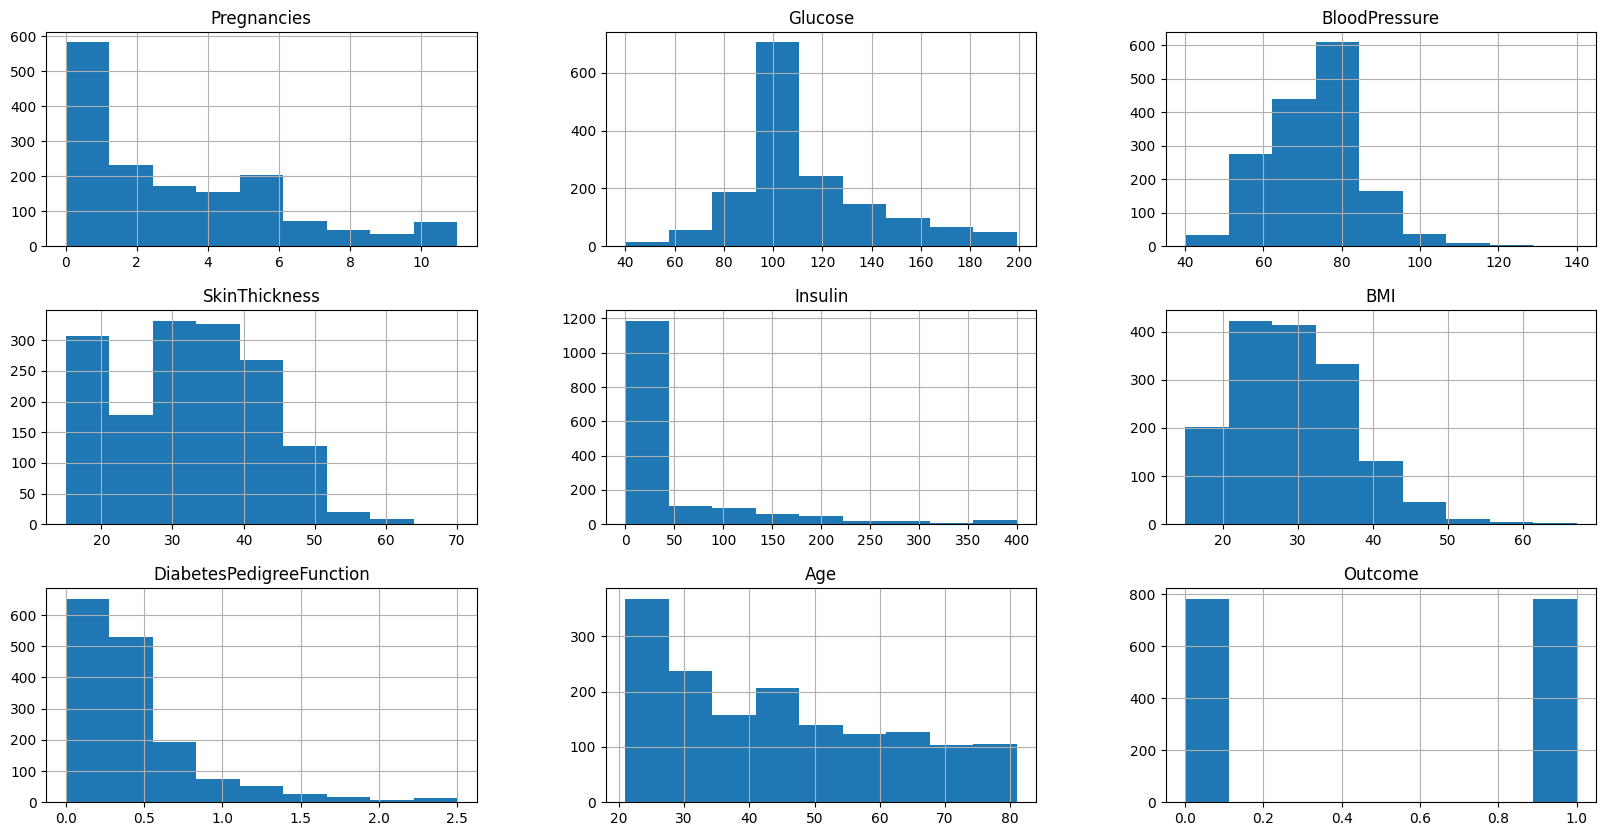

In [6]:
hist = df.hist(bins=9, figsize= (20,10))

### Transformando la columna `Age` en bins y codificando con `pd.get_dummies()`  

Cada bin se consideró como un cuartil para que los bins tengan aproximadamente el mismo número de muestras.

In [7]:
df['Age_bin'] = pd.qcut(df['Age'],4, labels = ['1','2','3','4'])
df = pd.get_dummies(df)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bin_1,Age_bin_2,Age_bin_3,Age_bin_4
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0,0,0,1,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0,0,1,0,0
2,8.0,183.0,64.0,33.0,0.0,23.3,0.672,32,1.0,0,1,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,1,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0,0,1,0,0


### Normalización z-score de las columns `BMI `, `BloodPressure`, y `Glucose` .  Escalado MinMax para las  columnas`DiabetesPedigreeFunction`, `Insulin`, `SkinThickness` y `Pregnancies`. 

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

standard = StandardScaler()

minMax = MinMaxScaler()

for col in ['BMI', 'BloodPressure','Glucose']:
    data = df[col].values.reshape(-1,1)
    df[col] = standard.fit_transform(data)
    
for col in ['DiabetesPedigreeFunction','Insulin','SkinThickness','Pregnancies']:
    data = df[col].values.reshape(-1,1)
    df[col] = minMax.fit_transform(data)

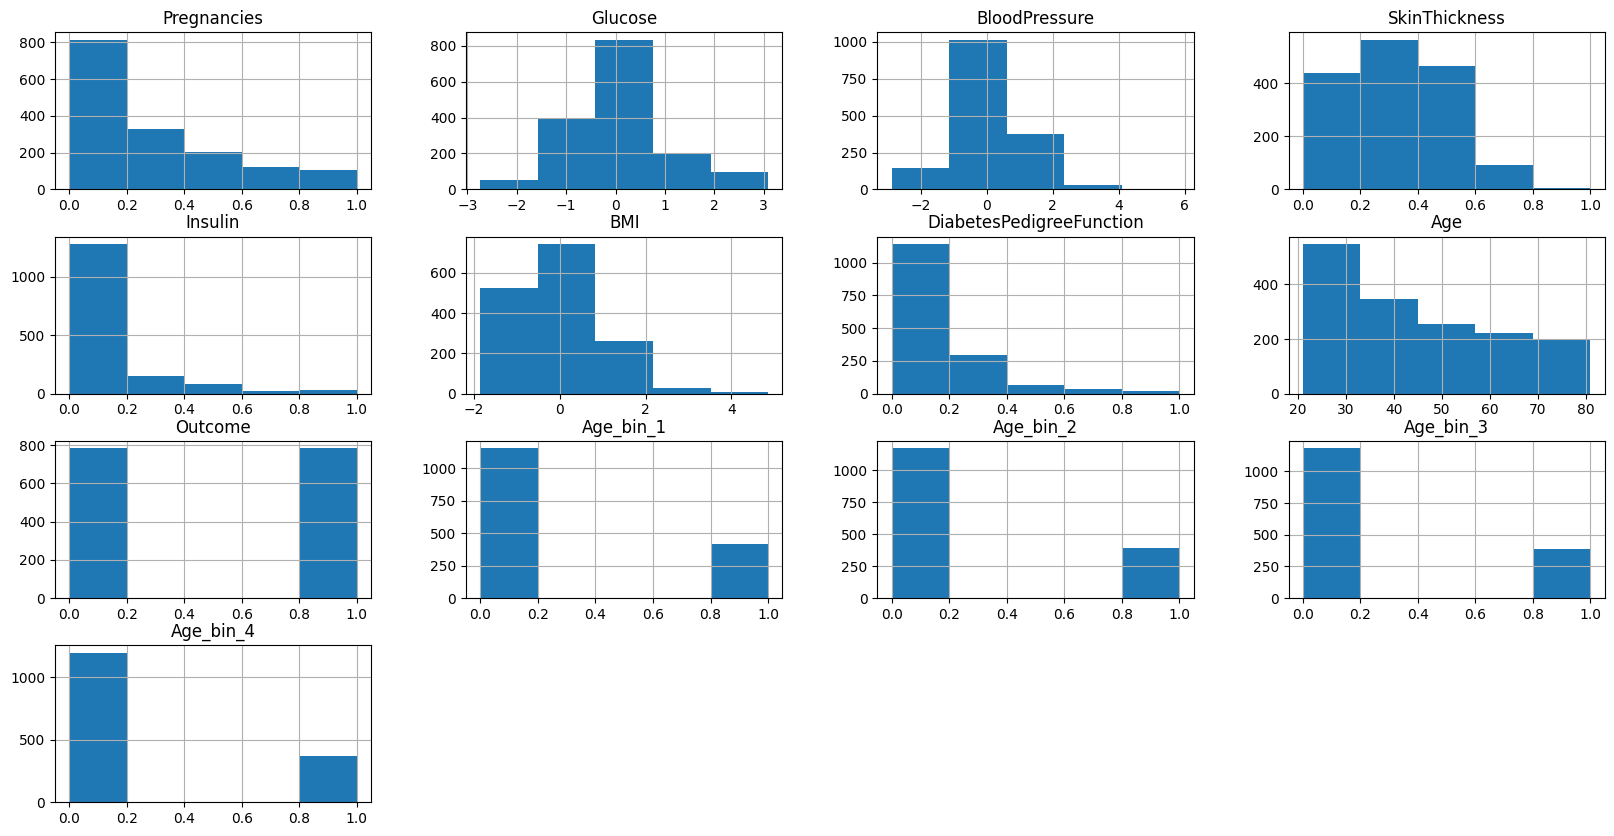

In [10]:
hist = df.hist(bins=5, figsize=(20,10))

In [11]:
# Colocamos el atributo objetivo al final del DataFrame
df = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction',  'Age_bin_1',
       'Age_bin_2', 'Age_bin_3', 'Age_bin_4', 'Outcome']]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_bin_1,Age_bin_2,Age_bin_3,Age_bin_4,Outcome
0,0.545455,1.219108,-0.096039,0.363636,0.000,0.543913,0.2508,0,0,1,0,1.0
1,0.090909,-1.086756,-0.619826,0.254545,0.000,-0.357653,0.1404,0,1,0,0,0.0
2,0.727273,2.500144,-0.794422,0.327273,0.000,-0.782677,0.2688,0,1,0,0,1.0
3,0.090909,-0.940352,-0.619826,0.145455,0.235,-0.164460,0.0668,1,0,0,0,0.0
4,0.000000,0.816497,-2.889572,0.363636,0.420,1.767467,0.9152,0,1,0,0,1.0


### Separamos los datos en conjuntos de entrenamiento y prueba.

In [12]:
from sklearn.model_selection import train_test_split

array = df.values
X = array[:, 0:11]   # todas las columnas excepto Outcome
y = array[:, 11]     # columna Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modelado

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report, f1_score

### Clasificador de Árbol de Decisión

In [14]:
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth= 6, min_samples_leaf=28)
dt2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf=28)

#Entrenamiento
model_ent = dt2.fit(X_train,y_train)
model_gini = dt1.fit(X_train,y_train)

# Prueba
y_predict_ent = model_ent.predict(X_test)
y_predict_gini = model_gini.predict(X_test)

# Métrica de 
acc_ent = accuracy_score(y_test, y_predict_ent) * 100
acc_gini = accuracy_score(y_test, y_predict_gini) * 100

print("Accuracy utilizando Gini es {}\nAccuracy utilziando Entropy es {}".format(acc_gini,acc_ent))

Accuracy utilizando Gini es 81.66023166023166
Accuracy utilziando Entropy es 81.46718146718148


### Visualization for best performing tree

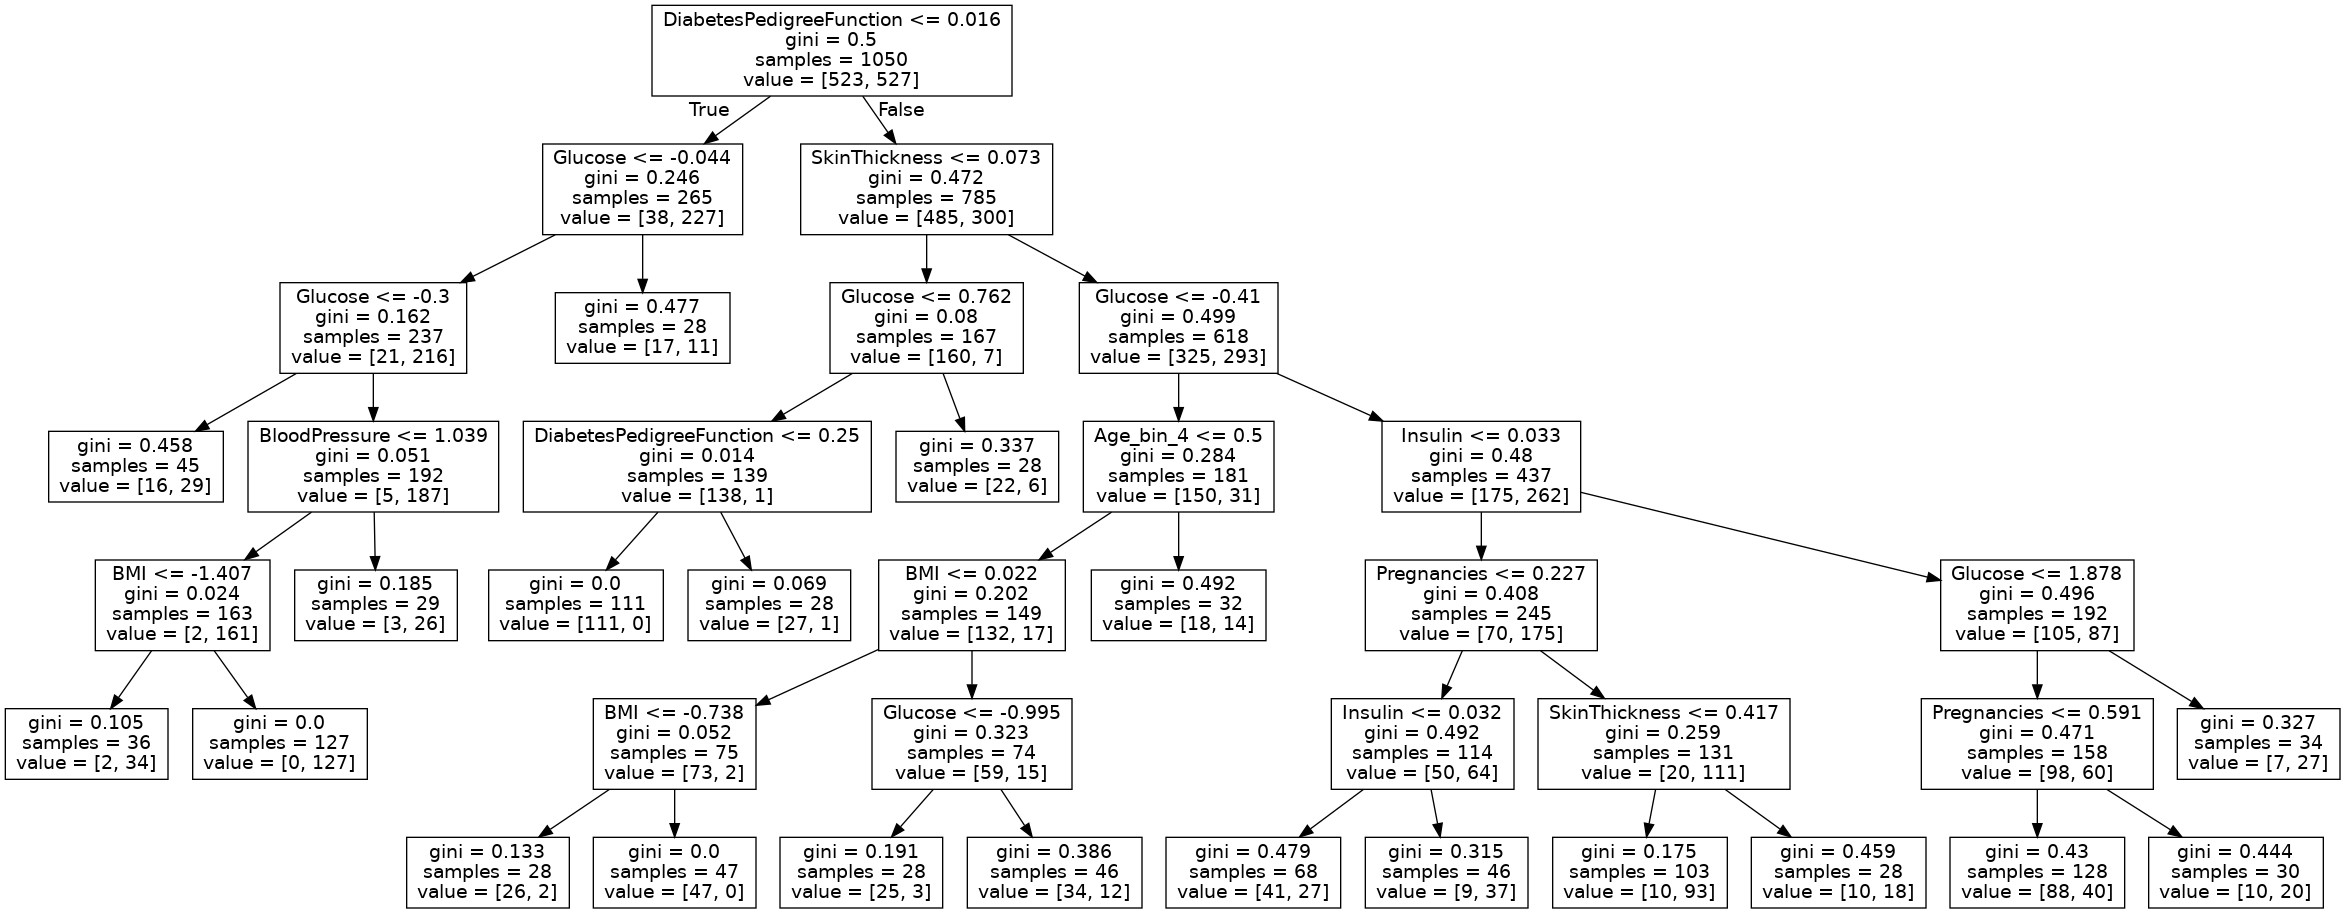

In [30]:
#create a visualization of the tree -- must install graphviz packages for this to work
# sudo apt install graphviz
dotfile = open("dtree_gini.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = list(df)[:-1])
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree_gini.dot -o dtree_gini.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

# show the png
from IPython.display import Image
Image(filename='dtree_gini.png', width=1000)

### Confusion Matrix

In [31]:
pd.DataFrame(
    confusion_matrix(y_test,y_predict_gini),
    columns=['Predicted Risk = 1', 'Predicted Risk = 0'],
    index=['True Risk', 'True no-Risk']
)

,Predicted Risk = 1,Predicted Risk = 0
True Risk,236,25
True no-Risk,70,187


In [32]:
roc_auc_score(y_test,y_predict_gini)

0.815920509265471

In [33]:
precision_score(y_test,y_predict_gini)

0.8820754716981132

In [34]:
recall_score(y_test,y_predict_gini)

0.7276264591439688

In [35]:
f1_score(y_test, y_predict_gini)

0.7974413646055437

### Bosque Aleatorio

In [36]:
clf = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=None, min_samples_split=2)

# Entrenamiento
clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=20)

In [37]:
# Ver una lista de los atributos y su score de importancia
cols = list(df.columns)
cols.pop()
list(zip(cols, clf.feature_importances_))

[('Pregnancies', 0.06359250692692846),
 ('Glucose', 0.2161361090612208),
 ('BloodPressure', 0.06754375589324167),
 ('SkinThickness', 0.206394656708103),
 ('Insulin', 0.11622211722965733),
 ('BMI', 0.10024467458759577),
 ('DiabetesPedigreeFunction', 0.13891584208240151),
 ('Age_bin_1', 0.0307519007214911),
 ('Age_bin_2', 0.013357182758899671),
 ('Age_bin_3', 0.011731602776341379),
 ('Age_bin_4', 0.0351096512541194)]

In [38]:
preds = clf.predict(X_test)
actual = y_test

In [46]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix = confusion_matrix(actual, preds)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
[[235  26]
 [ 56 201]]


/home/gerardo/rpaa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


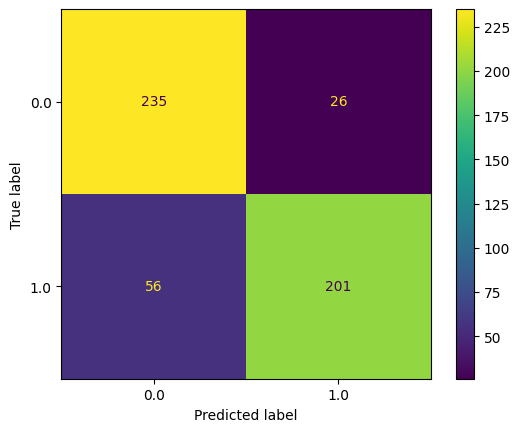

In [47]:
plot_confusion_matrix(clf, X_test, actual)  
plt.show()

### Participación

1. ¿Qué métrica podemos utilizar para comparar los modelos?

2. ¿Cómo podemos comparar el árbol de decisión y el bosque aleatorio en su capacidad para detectar verdaderos positivos?